# **Projet Machine Learning**






> 









Notre étude porte sur un jeux de données liées aux campagnes de marketing direct d'une institution bancaire portugaise. Nous allons réaliser un projet de machine learning en utilisant la classification (SVM et réseaux de neurones) afin de prédire combien de personnes vont ouvrir un compte bancaire avec l'institution bancaire portugais.

> Cette variable, à prédire est représenté par une variable binaire qui prendra la valeur de 1 lorsque une personne décide d'ouvrir un compte bancaire avec l'institution bancaire portugais, sinon elle prendra la valeur de 0.


> Nous allons commencer par analyser et nettoyer notre jeu de données (analyse des variables, identification valeurs manquantes, outliers), Ensuite, nous allons réaliser des classifications. Dans une premier partie nous allons réaliser une classification multiclass en utilisant deux approches OVR(one versus rest) et OVO(one versus one). Pour terminer, nous allons réaliser une classification avec keras.


Source des données :https://www.kaggle.com/datasets/aguado/telemarketing-jyb-dataset?select=train.csv

# Librairies python nécessaires

In [ ]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'id;age;job;marital;education;default;housing;loan;contact;month;day_of_week;campaign;pdays;previous;poutcome;emp.var.rate;cons.price.idx;cons.conf.idx;euribor3m;nr.employed;y\r\n1;52;technician;married;high.school;0;1;0;cellular;0v;tue;1;999;0;0nexistent;-0.1;93.2;-42;4.153;5195.8;0\r\n2;33;admin.;single;university.degree;0;1;0;cellular;0v;thu;1;999;0;0nexistent;-0.1;93.2;-42;4.076;5195.8;0\r\n5;54;admin.;single;university.degree;0;1;0;cellular;may;mon;1;999;0;0nexistent;-1.8;92.893;-46.2;1.264;5099.1;0\r\n6;53;housemaid;married;high.school;0;0;1;cellular;jun;thu;1;999;2;failure;-2.9;92.963;-40.8;1.26;5076.2;1\r\n8;42;self-employed;married;university.degree;NA;1;0;cellular;aug;tue;2;999;0;0nexistent;1.4;93.444;-36.1;4.966;5228.1;0\r\n10;36;management;married;university.degree;0;0;1;cellular;jul;wed;4;999;0;0nexistent;1.4;93.918;-42.7;4.963;5228.1;0\r\n11;40;technician;divorced;university.degree;0;1;0;cellular;apr;thu;1;999;0;0nexistent;-1.8;93.075;-47.1;1.365;5099.1;1\r

In [ ]:
!pip install tensorflow==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 43.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [ ]:
#Explore environnement 
import os
#Data management
import pandas as pd
import numpy as np
import seaborn as sns
#Graphique
import matplotlib.pyplot as plt
#Load data
from sklearn import datasets

In [ ]:
!pip install outlier-utils
from outliers import smirnov_grubbs as grubbs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install sklearn_evaluation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
#Modélisation 
#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Multiclass strategie
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

In [ ]:
!! pip install scipy
from scipy import stats

In [ ]:
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations/ std_dev
    #print("Grubbs Statistics Value : {}".format(Gcal))
    return Gcal, max_ind

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    #print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [ ]:

#Le package peut poser problème suivant la version de anaconda
from pandas_profiling import ProfileReport

#Web request
import requests
import io

In [ ]:
import matplotlib.pyplot as plt

In [ ]:


from pandas_profiling import ProfileReport

#Web request
import requests
import io

In [ ]:
!! pip install scikeras

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting scikeras',
 '  Downloading scikeras-0.10.0-py3-none-any.whl (27 kB)',
 'Requirement already satisfied: packaging>=0.21 in /usr/local/lib/python3.8/dist-packages (from scikeras) (21.3)',
 'Requirement already satisfied: scikit-learn>=1.0.0 in /usr/local/lib/python3.8/dist-packages (from scikeras) (1.0.2)',
 'Requirement already satisfied: pyparsing!=3.0.5,>=2.0.2 in /usr/local/lib/python3.8/dist-packages (from packaging>=0.21->scikeras) (3.0.9)',
 'Requirement already satisfied: threadpoolctl>=2.0.0 in /usr/local/lib/python3.8/dist-packages (from scikit-learn>=1.0.0->scikeras) (3.1.0)',
 'Requirement already satisfied: joblib>=0.11 in /usr/local/lib/python3.8/dist-packages (from scikit-learn>=1.0.0->scikeras) (1.2.0)',
 'Requirement already satisfied: scipy>=1.1.0 in /usr/local/lib/python3.8/dist-packages (from scikit-learn>=1.0.0->scikeras) (1.7.3)',
 'Requirement already

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV #RandomizedSearchCV marche aussi
#Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [ ]:

### Fonctions
#ESD test
def ESD_Test(input_series, alpha, max_outliers):
    input_series = np.array(input_series) #Transformation de la colonne en array
    
    #Initialisation des valeurs
    nb_outliers=0
    valeur_atypique_seuil="-"

    
    #Itération pour chaque valeur de la série
    for iterations in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        
        #Récupère les valeurs de la dernière itération où la valeur est considéré comme atypique
        if round(Gstat,4)>round(Gcritical,4) :
            nb_outliers+=1
            valeur_atypique_seuil=input_series[max_index]
            last_Gstat=Gstat
            last_Gcritical=Gcritical
        
        #Supprime la valeur de l'itération pour tester sur d'autres
        input_series = np.delete(input_series, max_index)
   
    #Print des résultats du test
    print("Nombre de valeurs atypiques : "+ str(nb_outliers))
    print("Valeur atypique seuil : {}".format(valeur_atypique_seuil))
    
    if nb_outliers>0 :
        print('{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(valeur_atypique_seuil, last_Gstat, last_Gcritical))
    
    if (max_outliers*0.8)<nb_outliers : #Marge de sécurité
        print('\033[1m' + "Veuillez augmenter le nombre d'outlier max par sécurité"+'\033[0m')
    
    return valeur_atypique_seuil

In [ ]:
from outliers import smirnov_grubbs as grubbs

In [ ]:
#Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Modélisation 
#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Multiclass strategie
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

# Importation des données

In [ ]:
# Importation de la base
df= pd.read_csv("train.csv",sep=";")
# Aperçu du dataframe
df.head(10)

id  age            job   marital            education  default  housing  \
0   1   52     technician   married          high.school      0.0      1.0   
1   2   33         admin.    single    university.degree      0.0      1.0   
2   5   54         admin.    single    university.degree      0.0      1.0   
3   6   53      housemaid   married          high.school      0.0      0.0   
4   8   42  self-employed   married    university.degree      NaN      1.0   
5  10   36     management   married    university.degree      0.0      0.0   
6  11   40     technician  divorced    university.degree      0.0      1.0   
7  12   44    blue-collar    single             basic.4y      0.0      1.0   
8  14   36     technician  divorced  professional.course      0.0      0.0   
9  15   48     management   married    university.degree      0.0      0.0   

   loan    contact month  ... campaign  pdays  previous    poutcome  \
0   0.0   cellular    0v  ...        1    999         0  0nexistent   
1   0.0   cellular    0v  ...        1    999         0  0nexistent   
2   0.0   cellular   may  ...        1    999         0  0nexistent   
3   1.0   cellular   jun  ...        1    999         2     failure   
4   0.0   cellular   aug  ...        2    999         0  0nexistent   
5   1.0   cellular   jul  ...        4    999         0  0nexistent   
6   0.0   cellular   apr  ...        1    999         0  0nexistent   
7   0.0   cellular   mar  ...        2    999         0  0nexistent   
8   0.0  telephone   may  ...        1    999         0  0nexistent   
9   0.0   cellular   jul  ...        4    999         0  0nexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0         -0.1          93.200          -42.0      4.153       5195.8  0  
1         -0.1          93.200          -42.0      4.076       5195.8  0  
2         -1.8          92.893          -46.2      1.264       5099.1  0  
3         -2.9          92.963          -40.8      1.260       5076.2  1  
4          1.4          93.444          -36.1      4.966       5228.1  0  
5          1.4          93.918          -42.7      4.963       5228.1  0  
6         -1.8          93.075          -47.1      1.365       5099.1  1  
7         -1.8          92.843          -50.0      1.510       5099.1  1  
8          1.1          93.994          -36.4      4.856       5191.0  0  
9          1.4          93.918          -42.7      4.968       5228.1  0  

[10 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28645 entries, 0 to 28644
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              28645 non-null  int64  
 1   age             28645 non-null  int64  
 2   job             28403 non-null  object 
 3   marital         28589 non-null  object 
 4   education       27435 non-null  object 
 5   default         22693 non-null  float64
 6   housing         27941 non-null  float64
 7   loan            27941 non-null  float64
 8   contact         28645 non-null  object 
 9   month           28645 non-null  object 
 10  day_of_week     28645 non-null  object 
 11  campaign        28645 non-null  int64  
 12  pdays           28645 non-null  int64  
 13  previous        28645 non-null  int64  
 14  poutcome        28645 non-null  object 
 15  emp.var.rate    28645 non-null  float64
 16  cons.price.idx  28645 non-null  float64
 17  cons.conf.idx   28645 non-null 

Nous avons utilisé la fonction **get_dummies** afin de convertir les variables qualitatives catégorielles en variables quantitatives. Cette fonction permet de créer une colonne pour chaque catégorie dans la variable qualitative et attribue une valeur de 1 ou 0 selon que la catégorie est présente ou non dans chaque ligne.

In [ ]:
base=pd.get_dummies(df)

Nous allons ensuite utiliser la fonction **shape** afin de connaitre la dimension de notre matrice. Nous constatons que notre tableau de données est constitué de 28645 lignes et 21 colonnes.

In [ ]:
df.shape

(28645, 21)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28645 entries, 0 to 28644
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             28645 non-null  int64  
 1   age                            28645 non-null  int64  
 2   default                        22693 non-null  float64
 3   housing                        27941 non-null  float64
 4   loan                           27941 non-null  float64
 5   campaign                       28645 non-null  int64  
 6   pdays                          28645 non-null  int64  
 7   previous                       28645 non-null  int64  
 8   emp.var.rate                   28645 non-null  float64
 9   cons.price.idx                 28645 non-null  float64
 10  cons.conf.idx                  28645 non-null  float64
 11  euribor3m                      28645 non-null  float64
 12  nr.employed                    28645 non-null 

# I. Analyse du jeu de données


## 1- Visualisation de notre variable à expliquer 

Nous allons commencer par visualiser notre variable à expliquer y

In [ ]:
##visualisation y 

base.y.value_counts(normalize=True)

0    0.88539
1    0.11461
Name: y, dtype: float64

In [ ]:
%matplotlib inline
plt.pie(
    base.y.value_counts(normalize=True).values,
    labels = base.y.value_counts(normalize=True).index,
)
plt.title("Répartition de la variable à expliquer")
plt.show()

In [ ]:
%matplotlib inline
plt.bar(
    base.y.value_counts().index,
    base.y.value_counts().values
)
plt.title("Répartition de la variable à expliquer")
plt.show()


D'après ces répresentation graphique nous constatons que environ 88% d'individus n'ont pas ouvert un compte bancaire avec l'institution bancaire portugais.

# 2- Identification et correction des valeurs manquantes

Nous allons vérifier qu'il n'y ait pas de valeurs manquantes et procéder au traitement de celles-ci dans le cas où il y'en aurait (suppression, imputation, etc.)

In [ ]:
base_na= base.isna().sum()/base.shape[0]*100
base_na.sort_values(ascending=False)

default                          20.778495
housing                           2.457671
loan                              2.457671
id                                0.000000
month_jun                         0.000000
education_high.school             0.000000
education_illiterate              0.000000
education_professional.course     0.000000
education_university.degree       0.000000
contact_cellular                  0.000000
contact_telephone                 0.000000
month_0v                          0.000000
month_apr                         0.000000
month_aug                         0.000000
month_dec                         0.000000
month_jul                         0.000000
month_may                         0.000000
month_mar                         0.000000
education_basic.6y                0.000000
month_oct                         0.000000
month_sep                         0.000000
day_of_week_fri                   0.000000
day_of_week_mon                   0.000000
day_of_week

Notre train set contient trois variables qui ont valeurs manquantes. Nous avons choisi de corriger ces valeurs en utilisant la fonction fillna, en remplaçant les valeurs manquantes par le mode de la série.

In [ ]:
base['default'].fillna(base.default.mode()[0], inplace = True)
base['housing'].fillna(base.housing.mode()[0], inplace = True)
base['loan'].fillna(base.loan.mode()[0], inplace = True)

In [ ]:
# Vérification s'il y a encore des valeurs manquantes
base_verif= base.isna().sum()/base.shape[0]*100
base_verif.sort_values(ascending=False)

id                               0.0
month_jul                        0.0
education_basic.9y               0.0
education_high.school            0.0
education_illiterate             0.0
education_professional.course    0.0
education_university.degree      0.0
contact_cellular                 0.0
contact_telephone                0.0
month_0v                         0.0
month_apr                        0.0
month_aug                        0.0
month_dec                        0.0
month_jun                        0.0
education_basic.4y               0.0
month_mar                        0.0
month_may                        0.0
month_oct                        0.0
month_sep                        0.0
day_of_week_fri                  0.0
day_of_week_mon                  0.0
day_of_week_thu                  0.0
day_of_week_tue                  0.0
day_of_week_wed                  0.0
poutcome_0nexistent              0.0
poutcome_failure                 0.0
education_basic.6y               0.0
m

In [ ]:
#convertir les variables float en int
var_int=['default','housing','loan']
base[var_int]=base[var_int].astype('int64')

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28645 entries, 0 to 28644
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             28645 non-null  int64  
 1   age                            28645 non-null  int64  
 2   default                        28645 non-null  int64  
 3   housing                        28645 non-null  int64  
 4   loan                           28645 non-null  int64  
 5   campaign                       28645 non-null  int64  
 6   pdays                          28645 non-null  int64  
 7   previous                       28645 non-null  int64  
 8   emp.var.rate                   28645 non-null  float64
 9   cons.price.idx                 28645 non-null  float64
 10  cons.conf.idx                  28645 non-null  float64
 11  euribor3m                      28645 non-null  float64
 12  nr.employed                    28645 non-null 

In [ ]:
base.describe()

id           age       default       housing          loan  \
count  28645.000000  28645.000000  28645.000000  28645.000000  28645.000000   
mean   20605.360272     39.983522      0.000070      0.548682      0.151091   
std    11885.805422     10.420328      0.008356      0.497633      0.358144   
min        1.000000     17.000000      0.000000      0.000000      0.000000   
25%    10354.000000     32.000000      0.000000      0.000000      0.000000   
50%    20547.000000     38.000000      0.000000      1.000000      0.000000   
75%    30921.000000     47.000000      0.000000      1.000000      0.000000   
max    41187.000000     98.000000      1.000000      1.000000      1.000000   

           campaign         pdays      previous  emp.var.rate  cons.price.idx  \
count  28645.000000  28645.000000  28645.000000  28645.000000    28645.000000   
mean       2.558597    962.634177      0.168546      0.081533       93.575515   
std        2.759939    186.526076      0.486813      1.574052        0.579850   
min        1.000000      0.000000      0.000000     -3.400000       92.201000   
25%        1.000000    999.000000      0.000000     -1.800000       93.075000   
50%        2.000000    999.000000      0.000000      1.100000       93.798000   
75%        3.000000    999.000000      0.000000      1.400000       93.994000   
max       43.000000    999.000000      7.000000      1.400000       94.767000   

       ...     month_oct     month_sep  day_of_week_fri  day_of_week_mon  \
count  ...  28645.000000  28645.000000     28645.000000     28645.000000   
mean   ...      0.017944      0.013929         0.188549         0.205446   
std    ...      0.132750      0.117199         0.391157         0.404034   
min    ...      0.000000      0.000000         0.000000         0.000000   
25%    ...      0.000000      0.000000         0.000000         0.000000   
50%    ...      0.000000      0.000000         0.000000         0.000000   
75%    ...      0.000000      0.000000         0.000000         0.000000   
max    ...      1.000000      1.000000         1.000000         1.000000   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_0nexistent  \
count     28645.000000     28645.000000     28645.000000         28645.000000   
mean          0.211590         0.195776         0.198639             0.866608   
std           0.408443         0.396804         0.398982             0.340003   
min           0.000000         0.000000         0.000000             0.000000   
25%           0.000000         0.000000         0.000000             1.000000   
50%           0.000000         0.000000         0.000000             1.000000   
75%           0.000000         0.000000         0.000000             1.000000   
max           1.000000         1.000000         1.000000             1.000000   

       poutcome_failure  poutcome_success  
count      28645.000000       28645.00000  
mean           0.100192           0.03320  
std            0.300261           0.17916  
min            0.000000           0.00000  
25%            0.000000           0.00000  
50%            0.000000           0.00000  
75%            0.000000           0.00000  
max            1.000000           1.00000  

[8 rows x 55 columns]

Le tableau ci-dessus représente les statistiques descriptives pour les variables numériques.

# 3- Lien entre variables 


> Nous allons utiliser la corrélation de Spearman afin d'étudier les liens entre les variables explicatives.



In [ ]:
# On crée une liste contenant nos variables explicatives 
var_x = list(base.drop(['y','id'],axis=1))
var_x

['age',
 'default',
 'housing',
 'loan',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_0v',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_0nexistent',
 'poutcome_failure',
 'poutcome_success']

In [ ]:
base[var_x].describe() 

age       default       housing          loan      campaign  \
count  28645.000000  28645.000000  28645.000000  28645.000000  28645.000000   
mean      39.983522      0.000070      0.548682      0.151091      2.558597   
std       10.420328      0.008356      0.497633      0.358144      2.759939   
min       17.000000      0.000000      0.000000      0.000000      1.000000   
25%       32.000000      0.000000      0.000000      0.000000      1.000000   
50%       38.000000      0.000000      1.000000      0.000000      2.000000   
75%       47.000000      0.000000      1.000000      0.000000      3.000000   
max       98.000000      1.000000      1.000000      1.000000     43.000000   

              pdays      previous  emp.var.rate  cons.price.idx  \
count  28645.000000  28645.000000  28645.000000    28645.000000   
mean     962.634177      0.168546      0.081533       93.575515   
std      186.526076      0.486813      1.574052        0.579850   
min        0.000000      0.000000     -3.400000       92.201000   
25%      999.000000      0.000000     -1.800000       93.075000   
50%      999.000000      0.000000      1.100000       93.798000   
75%      999.000000      0.000000      1.400000       93.994000   
max      999.000000      7.000000      1.400000       94.767000   

       cons.conf.idx  ...     month_oct     month_sep  day_of_week_fri  \
count   28645.000000  ...  28645.000000  28645.000000     28645.000000   
mean      -40.482845  ...      0.017944      0.013929         0.188549   
std         4.639215  ...      0.132750      0.117199         0.391157   
min       -50.800000  ...      0.000000      0.000000         0.000000   
25%       -42.700000  ...      0.000000      0.000000         0.000000   
50%       -41.800000  ...      0.000000      0.000000         0.000000   
75%       -36.400000  ...      0.000000      0.000000         0.000000   
max       -26.900000  ...      1.000000      1.000000         1.000000   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
count     28645.000000     28645.000000     28645.000000     28645.000000   
mean          0.205446         0.211590         0.195776         0.198639   
std           0.404034         0.408443         0.396804         0.398982   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       poutcome_0nexistent  poutcome_failure  poutcome_success  
count         28645.000000      28645.000000       28645.00000  
mean              0.866608          0.100192           0.03320  
std               0.340003          0.300261           0.17916  
min               0.000000          0.000000           0.00000  
25%               1.000000          0.000000           0.00000  
50%               1.000000          0.000000           0.00000  
75%               1.000000          0.000000           0.00000  
max               1.000000          1.000000           1.00000  

[8 rows x 53 columns]

In [ ]:
#Analyse des corrélations
base[var_x].corr(method='spearman')

age   default   housing      loan  \
age                            1.000000  0.007918 -0.001686 -0.007643   
default                        0.007918  1.000000 -0.000817 -0.003525   
housing                       -0.001686 -0.000817  1.000000  0.038649   
loan                          -0.007643 -0.003525  0.038649  1.000000   
campaign                      -0.001260 -0.008691 -0.008404  0.013281   
pdays                         -0.002387  0.001629 -0.017465 -0.002014   
previous                      -0.007927 -0.003273  0.030255 -0.000507   
emp.var.rate                   0.040621  0.009137 -0.053160  0.001593   
cons.price.idx                 0.038252 -0.001936 -0.088008 -0.017080   
cons.conf.idx                  0.114497  0.010884 -0.033739 -0.015280   
euribor3m                      0.051494  0.010325 -0.038831  0.005030   
nr.employed                    0.042122  0.009127 -0.039009  0.005482   
job_admin.                    -0.098728 -0.004848  0.002967  0.019354   
job_blue-collar                0.005873 -0.004509 -0.010565 -0.007673   
job_entrepreneur               0.047215 -0.001588  0.007428 -0.003077   
job_housemaid                  0.084503 -0.001348 -0.004858 -0.003002   
job_management                 0.076313 -0.002339 -0.007392 -0.002467   
job_retired                    0.317012 -0.001749  0.000169 -0.007590   
job_self-employed             -0.005136 -0.001592  0.004836 -0.011425   
job_services                  -0.057167 -0.002706 -0.004624  0.001109   
job_student                   -0.210352 -0.001238  0.005595  0.004761   
job_technician                -0.055307  0.018861  0.009319 -0.002666   
job_unemployed                -0.003006 -0.001309  0.008078 -0.003601   
marital_divorced               0.165600 -0.002958 -0.004303 -0.006191   
marital_married                0.298644  0.006737 -0.010147 -0.004407   
marital_single                -0.440259 -0.005219  0.014785  0.008576   
education_basic.4y             0.215396 -0.002786 -0.006668 -0.002607   
education_basic.6y             0.031747 -0.002053 -0.005419 -0.003546   
education_basic.9y            -0.023622 -0.003459  0.001682 -0.010818   
education_high.school         -0.101618 -0.004614 -0.015383 -0.001866   
education_illiterate           0.017637 -0.000185  0.007359  0.003902   
education_professional.course -0.000258  0.022005  0.017176 -0.004534   
education_university.degree   -0.076343 -0.005397  0.013094  0.018427   
contact_cellular              -0.028968  0.006335  0.080798  0.017951   
contact_telephone              0.028968 -0.006335 -0.080798 -0.017951   
month_0v                       0.040424 -0.002775  0.026505 -0.003211   
month_apr                      0.010340 -0.002178  0.029407  0.003480   
month_aug                      0.065080  0.019918  0.026115  0.000894   
month_dec                      0.035788 -0.000551  0.006372  0.003363   
month_jul                     -0.044530 -0.003870 -0.005396  0.014692   
month_jun                     -0.002581 -0.003203 -0.053874 -0.011813   
month_mar                     -0.018383 -0.000958  0.012325 -0.003621   
month_may                     -0.051248 -0.005910 -0.017709 -0.000252   
month_oct                      0.018074 -0.001130  0.004216 -0.010031   
month_sep                      0.012867 -0.000993  0.013813 -0.001901   
day_of_week_fri                0.011044 -0.004028 -0.017116  0.007216   
day_of_week_mon                0.021098 -0.004249  0.009725  0.006714   
day_of_week_thu               -0.024336 -0.004329  0.011068 -0.000659   
day_of_week_tue                0.020187  0.016936 -0.008134 -0.014326   
day_of_week_wed               -0.027357 -0.004160  0.003692  0.001049   
poutcome_0nexistent            0.008056  0.003278 -0.030431  0.000665   
poutcome_failure              -0.012496 -0.002788  0.023197 -0.001828   
poutcome_success               0.005653 -0.001548  0.018875  0.001802   

                               campaign     pdays  previous  emp.var.rate  \
age             

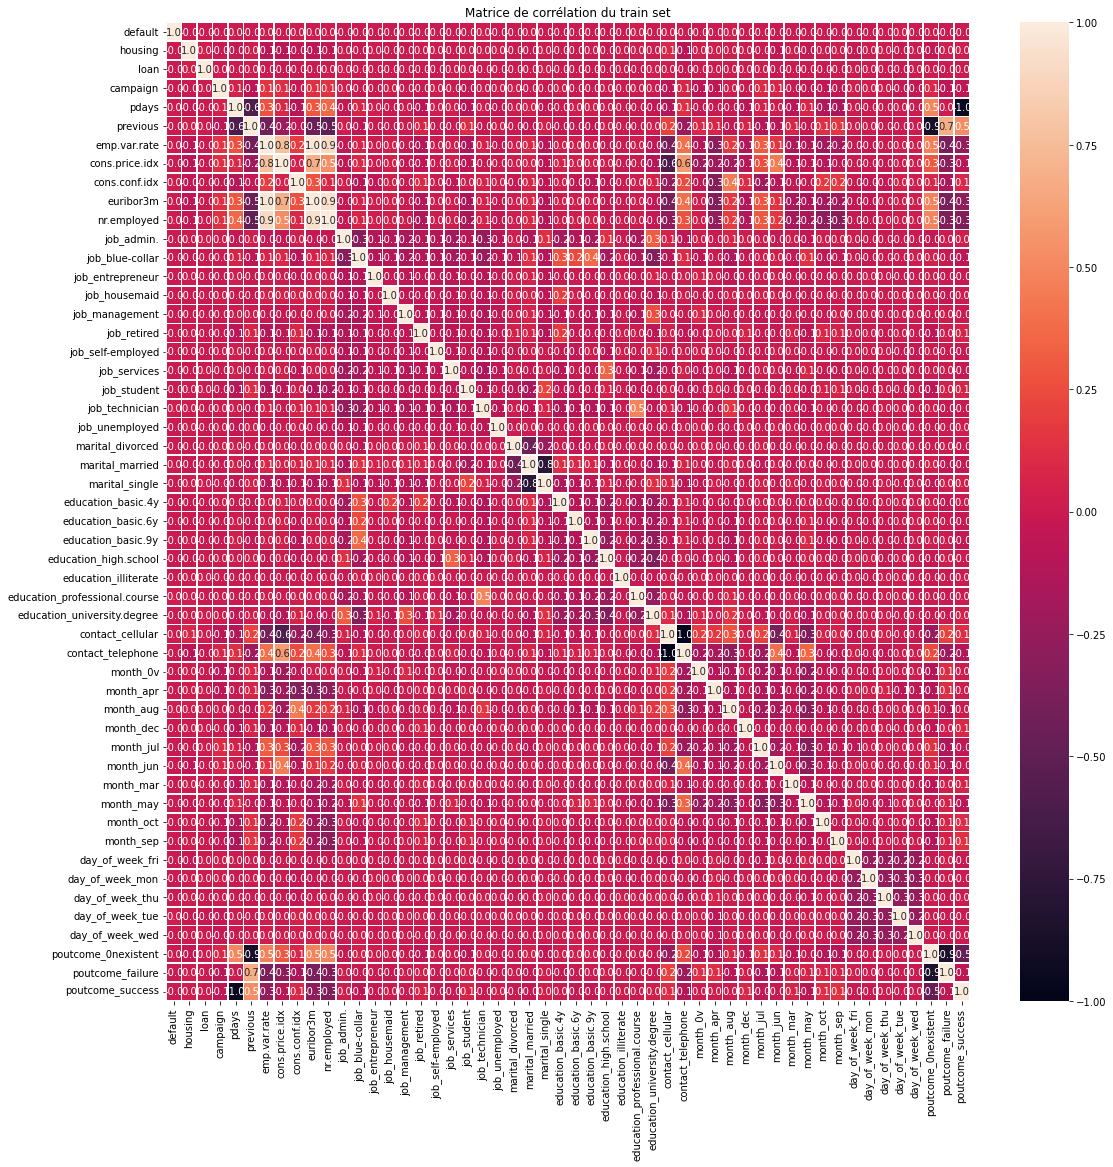

In [ ]:
%matplotlib inline
corr = (base[var_x].iloc[:,1:]).corr()
f,ax = plt.subplots(figsize=(18, 18))

sns.heatmap(corr, annot=True, linewidths=.6, fmt= '.1f',ax=ax)
plt.title("Matrice de corrélation du train set")
plt.show()


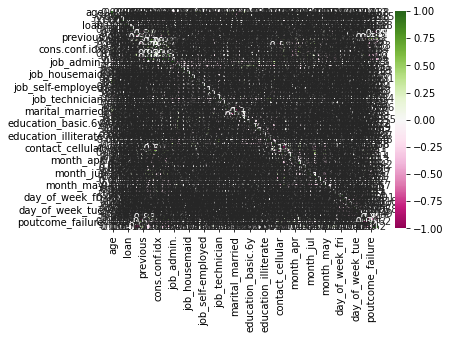

In [ ]:
%matplotlib inline
sns.heatmap(base[var_x].corr(),cmap='PiYG',annot=True)


In [ ]:
%matplotlib inline
m_corr = base[var_x].corr()
fig = plt.figure(figsize=(35,35), dpi = 480)
sns.heatmap(m_corr[abs(m_corr)>=0.65],annot = True, fmt = '.2f')

In [ ]:
upper_tri = m_corr.where(np.triu(np.ones(m_corr.shape),k=1).astype(np.bool))
print(upper_tri)

                               age   default   housing      loan  campaign  \
age                            NaN  0.006429 -0.000317 -0.007733  0.003142   
default                        NaN       NaN -0.000817 -0.003525 -0.004719   
housing                        NaN       NaN       NaN  0.038649 -0.011399   
loan                           NaN       NaN       NaN       NaN  0.004005   
campaign                       NaN       NaN       NaN       NaN       NaN   
pdays                          NaN       NaN       NaN       NaN       NaN   
previous                       NaN       NaN       NaN       NaN       NaN   
emp.var.rate                   NaN       NaN       NaN       NaN       NaN   
cons.price.idx                 NaN       NaN       NaN       NaN       NaN   
cons.conf.idx                  NaN       NaN       NaN       NaN       NaN   
euribor3m                      NaN       NaN       NaN       NaN       NaN   
nr.employed                    NaN       NaN       NaN       NaN

<ipython-input-39-cf58541f2ac9>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = m_corr.where(np.triu(np.ones(m_corr.shape),k=1).astype(np.bool))


In [ ]:
##Détection et suppression des variables avec une corrélation supérieur à 0.65
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.65)]
print(to_drop) 

drop=['cons.price.idx', 'euribor3m', 'poutcome_failure']

['cons.price.idx', 'euribor3m', 'nr.employed', 'poutcome_failure']


Nous constatons qu'il existe trois variables fortement corrélées, avec une corrélation supérieure au seuil de 0.65.

* cons.price.idx : indice des prix à la consommation ( Indicateur mensuel)
* euribor3m : taux euribor 3 mois (indicateur journalier)
* poutcome_failure : résultat de la campagne marketing précédente (catégoriel : 'échec', 'inexistant', 'succès')

Nous avons fait le choix de supprimer ces trois variables.

In [ ]:
base_no_corr = base.drop(drop, axis=1)
base_no_corr

id  age  default  housing  loan  campaign  pdays  previous  \
0          1   52        0        1     0         1    999         0   
1          2   33        0        1     0         1    999         0   
2          5   54        0        1     0         1    999         0   
3          6   53        0        0     1         1    999         2   
4          8   42        0        1     0         2    999         0   
...      ...  ...      ...      ...   ...       ...    ...       ...   
28640  41183   28        0        1     0         4    999         1   
28641  41184   44        0        0     0         2    999         0   
28642  41185   48        0        1     1         3    999         0   
28643  41186   32        0        0     0         2    999         0   
28644  41187   26        0        0     0         2    999         0   

       emp.var.rate  cons.conf.idx  ...  month_may  month_oct  month_sep  \
0              -0.1          -42.0  ...          0          0          0   
1              -0.1          -42.0  ...          0          0          0   
2              -1.8          -46.2  ...          1          0          0   
3              -2.9          -40.8  ...          0          0          0   
4               1.4          -36.1  ...          0          0          0   
...             ...            ...  ...        ...        ...        ...   
28640          -1.8          -46.2  ...          1          0          0   
28641           1.4          -42.7  ...          0          0          0   
28642          -0.1          -42.0  ...          0          0          0   
28643          -1.8          -46.2  ...          1          0          0   
28644          -1.8          -46.2  ...          1          0          0   

       day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                    0                0                0                1   
1                    0                0                1                0   
2                    0                1                0                0   
3                    0                0                1                0   
4                    0                0                0                1   
...                ...              ...              ...              ...   
28640                0                0                0                1   
28641                0                0                1                0   
28642                1                0                0                0   
28643                0                1                0                0   
28644                0                1                0                0   

       day_of_week_wed  poutcome_0nexistent  poutcome_success  
0                    0                    1                 0  
1                    0                    1                 0  
2                    0                    1                 0  
3                    0                    0                 0  
4                    0                    1                 0  
...                ...                  ...               ...  
28640                0                    0                 0  
28641                0                    1                 0  
28642                0                    1                 0  
28643                0                    1                 0  
28644                0                    1                 0  

[28645 rows x 52 columns]

In [ ]:
var_x.remove('cons.price.idx')
var_x

['age',
 'default',
 'housing',
 'loan',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_0v',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_0nexistent',
 'poutcome_failure',
 'poutcome_success']

In [ ]:
var_x.remove('euribor3m')
var_x

['age',
 'default',
 'housing',
 'loan',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_0v',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_0nexistent',
 'poutcome_failure',
 'poutcome_success']

In [ ]:
var_x.remove('poutcome_failure')
var_x


['age',
 'default',
 'housing',
 'loan',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_0v',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_0nexistent',
 'poutcome_success']

In [ ]:
base[var_x].describe()

age       default       housing          loan      campaign  \
count  28645.000000  28645.000000  28645.000000  28645.000000  28645.000000   
mean      39.983522      0.000070      0.548682      0.151091      2.558597   
std       10.420328      0.008356      0.497633      0.358144      2.759939   
min       17.000000      0.000000      0.000000      0.000000      1.000000   
25%       32.000000      0.000000      0.000000      0.000000      1.000000   
50%       38.000000      0.000000      1.000000      0.000000      2.000000   
75%       47.000000      0.000000      1.000000      0.000000      3.000000   
max       98.000000      1.000000      1.000000      1.000000     43.000000   

              pdays      previous  emp.var.rate  cons.conf.idx   nr.employed  \
count  28645.000000  28645.000000  28645.000000   28645.000000  28645.000000   
mean     962.634177      0.168546      0.081533     -40.482845   5167.001431   
std      186.526076      0.486813      1.574052       4.639215     72.344892   
min        0.000000      0.000000     -3.400000     -50.800000   4963.600000   
25%      999.000000      0.000000     -1.800000     -42.700000   5099.100000   
50%      999.000000      0.000000      1.100000     -41.800000   5191.000000   
75%      999.000000      0.000000      1.400000     -36.400000   5228.100000   
max      999.000000      7.000000      1.400000     -26.900000   5228.100000   

       ...     month_may     month_oct     month_sep  day_of_week_fri  \
count  ...  28645.000000  28645.000000  28645.000000     28645.000000   
mean   ...      0.333461      0.017944      0.013929         0.188549   
std    ...      0.471458      0.132750      0.117199         0.391157   
min    ...      0.000000      0.000000      0.000000         0.000000   
25%    ...      0.000000      0.000000      0.000000         0.000000   
50%    ...      0.000000      0.000000      0.000000         0.000000   
75%    ...      1.000000      0.000000      0.000000         0.000000   
max    ...      1.000000      1.000000      1.000000         1.000000   

       day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
count     28645.000000     28645.000000     28645.000000     28645.000000   
mean          0.205446         0.211590         0.195776         0.198639   
std           0.404034         0.408443         0.396804         0.398982   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           0.000000         0.000000         0.000000         0.000000   
max           1.000000         1.000000         1.000000         1.000000   

       poutcome_0nexistent  poutcome_success  
count         28645.000000       28645.00000  
mean              0.866608           0.03320  
std               0.340003           0.17916  
min               0.000000           0.00000  
25%               1.000000           0.00000  
50%               1.000000           0.00000  
75%               1.000000           0.00000  
max               1.000000           1.00000  

[8 rows x 50 columns]

# 4- Détection et traitement des outliers

Nous allons commencer par visualiser grâce à des boxplots s'il y a des potentiels individus atypiques.
Ensuite, nous allons vérifier avec ESD test et Grubbs test, si les observations avec des valeurs très différentes des autres observations détecté précédemment peuvent être considéré comme des individus atypiques ou non. 

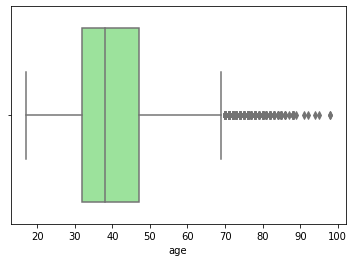

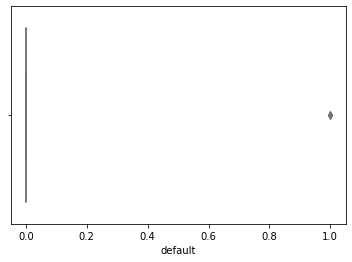

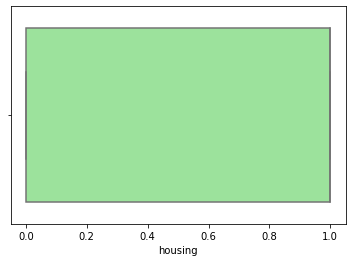

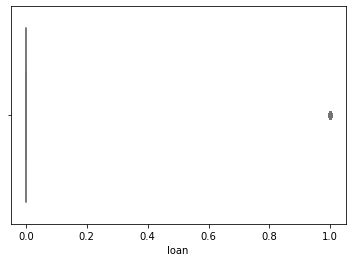

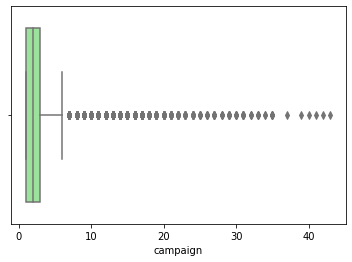

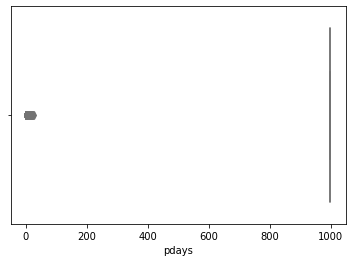

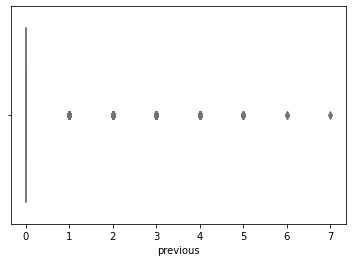

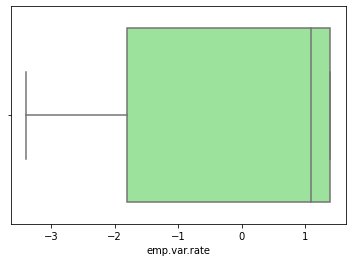

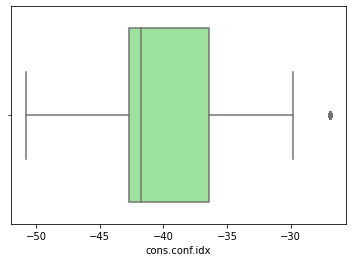

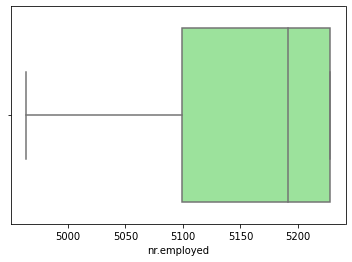

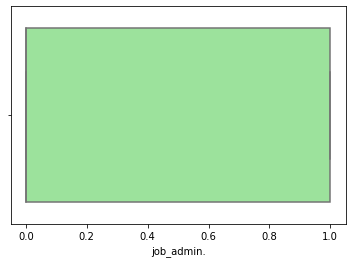

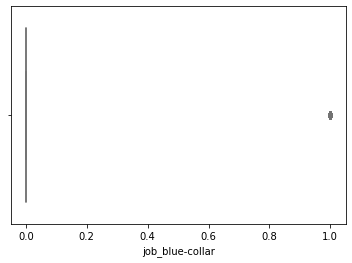

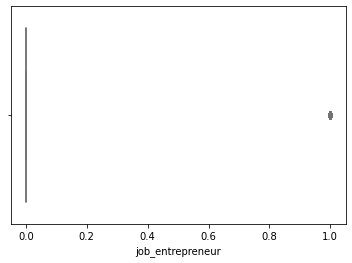

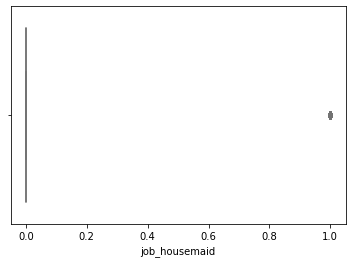

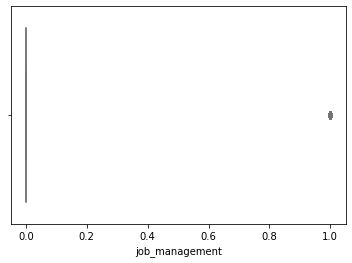

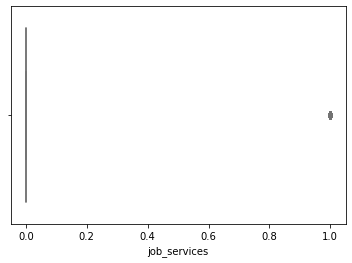

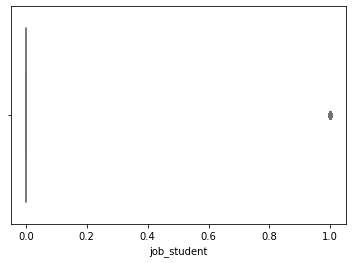

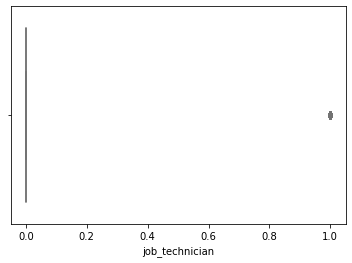

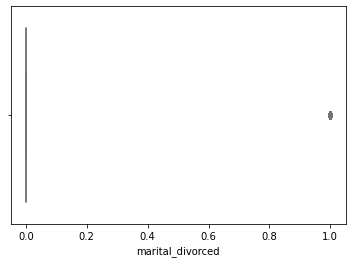

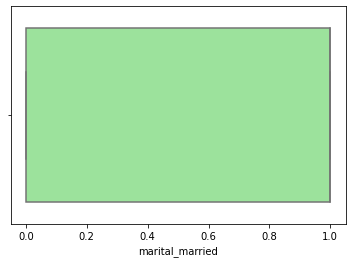

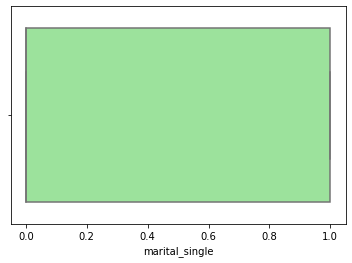

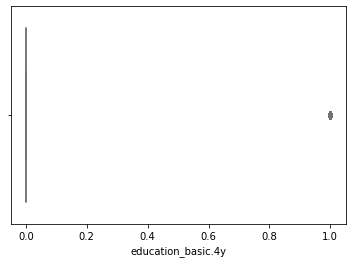

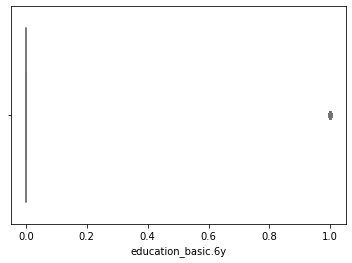

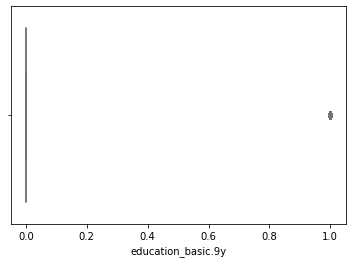

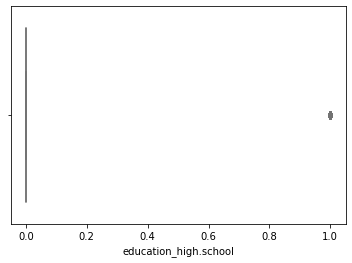

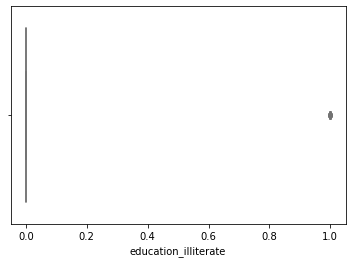

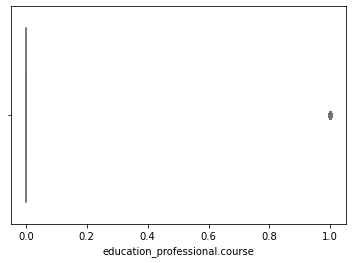

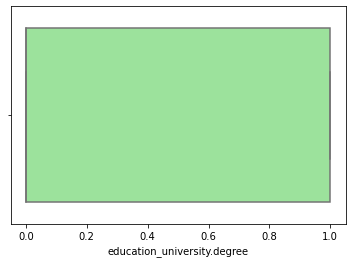

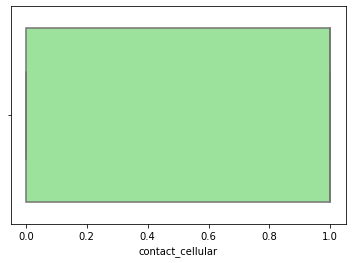

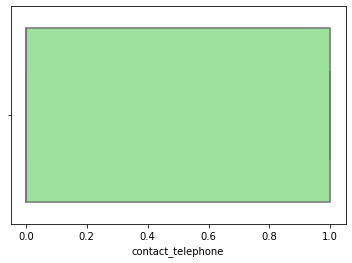

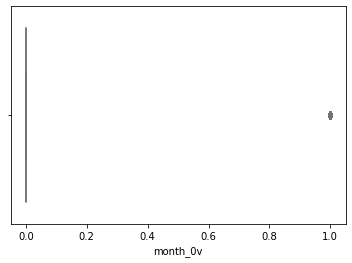

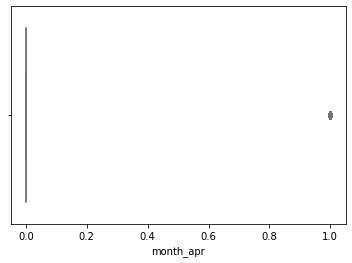

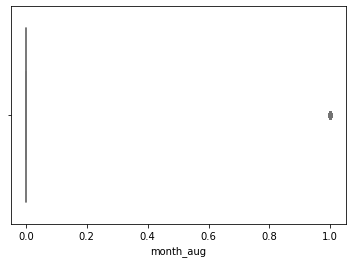

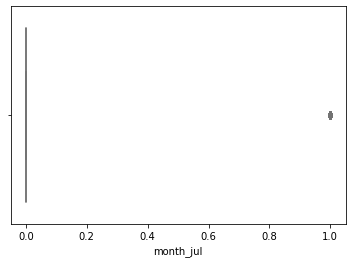

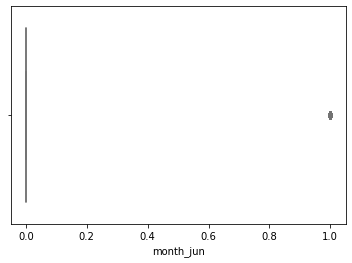

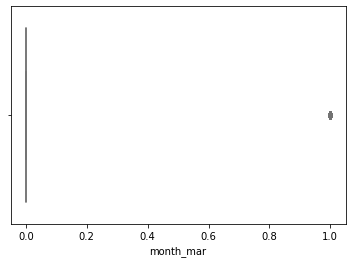

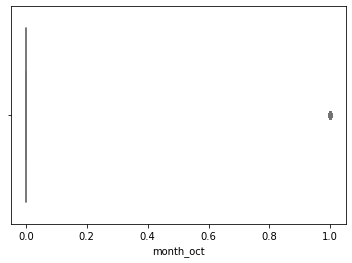

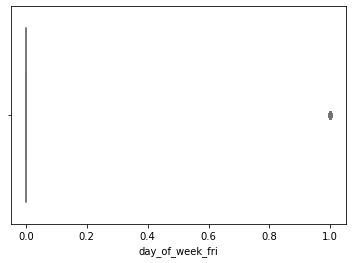

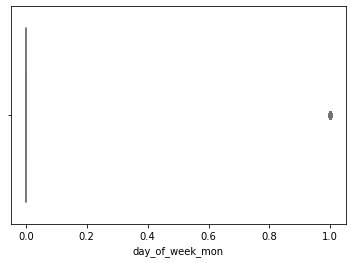

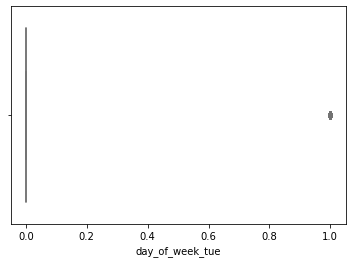

In [ ]:
# Détection des outliers via les boxplots

for i, var in enumerate(base[var_x].columns):
  plt.figure(i)
  sns.boxplot(x = base[var],
              color = "lightgreen")
  plt.show()

In [ ]:
ESD_Test(base['age'],0.5,100)

Nombre de valeurs atypiques : 40
Valeur atypique seuil : 84
84 is an outlier. G > G-critical: 4.2960 > 4.2942 



84

In [ ]:
ESD_Test(base['campaign'],0.5,10000)

Nombre de valeurs atypiques : 862
Valeur atypique seuil : 9
9 is an outlier. G > G-critical: 4.4737 > 4.2872 



9

In [ ]:
ESD_Test(base['previous'],0.5,1000)

Nombre de valeurs atypiques : 727
Valeur atypique seuil : 2
2 is an outlier. G > G-critical: 6.0141 > 4.2888 



2

In [ ]:
ESD_Test(base['pdays'],0.5,10000)

<ipython-input-10-c8ed8ad9ef63>:7: RuntimeWarning: invalid value encountered in double_scalars
  Gcal = max_of_deviations/ std_dev


Nombre de valeurs atypiques : 1049
Valeur atypique seuil : 26
26 is an outlier. G > G-critical: 166.1204 > 4.2862 



26

In [ ]:
base_bis=base.copy()

In [ ]:
base_bis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28645 entries, 0 to 28644
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             28645 non-null  int64  
 1   age                            28645 non-null  int64  
 2   default                        28645 non-null  int64  
 3   housing                        28645 non-null  int64  
 4   loan                           28645 non-null  int64  
 5   campaign                       28645 non-null  int64  
 6   pdays                          28645 non-null  int64  
 7   previous                       28645 non-null  int64  
 8   emp.var.rate                   28645 non-null  float64
 9   cons.price.idx                 28645 non-null  float64
 10  cons.conf.idx                  28645 non-null  float64
 11  euribor3m                      28645 non-null  float64
 12  nr.employed                    28645 non-null 

In [ ]:
base_bis=base_bis[base_bis.age<84]

In [ ]:
base_bis=base_bis[base_bis.campaign<9]

In [ ]:
base_bis=base_bis[base_bis.pdays<26]

In [ ]:
base_bis=base_bis[base_bis.previous<2]

In [ ]:
one_outlier=var_x
one_outlier

['age',
 'default',
 'housing',
 'loan',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.conf.idx',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_0v',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_0nexistent',
 'poutcome_success']

In [ ]:
one_outlier.remove('age')

In [ ]:
one_outlier.remove('campaign')

In [ ]:
one_outlier.remove('pdays')

In [ ]:
one_outlier.remove('previous')

In [ ]:
one_outlier

['default',
 'housing',
 'loan',
 'emp.var.rate',
 'cons.conf.idx',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'contact_cellular',
 'contact_telephone',
 'month_0v',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_0nexistent',
 'poutcome_success']

In [ ]:
# # Nous faisons le test de Grubbs pour les variables ayant une valeur atypique potentielle.
# alpha =0.05
# #La fonction max_test_indices nous donne l'index de l'observation atypique
#  for var in one_outlier:
#   print(var,grubbs.max_test_indices(base_bis[var],alpha))

In [ ]:
base_bis.shape

(597, 55)

In [ ]:
base[var_x].shape

(28645, 46)

Nous constatons qu'en supprimant les outliers nous réduisant notre échantillon de façon significatif, en effet, on passe de 28645 à 597 observations. C'est pour cette raison nous avons fait le choix de conserver ces individus atypiques.

De plus, nous constatons que certaines de ces observations ne sont pas considérées comme étant atypiques. Par exemple le test ESD considère les individus avec plus de 85 ans comme étant atypique, or, il est normal que le comportement d'une personne âgée soit différent dans le fait d'ouvrir un compte bancaire.

# II- Classification 

Nous allons commencer par découper notre dataset en utilisant la fonction train_test_split afin de diviser les données d'entrainement et de test en ensembles distincts afin de pouvoir entrainer et évaluer nos modèles.


In [ ]:
X_train , X_test, y_train, y_test = train_test_split(base[var_x],  
                                                    base['y'], 
                                                    test_size=0.5 ,
                                                    shuffle=True ,
                                                    random_state=42
                                                   )

In [ ]:
y_train.value_counts()

0    12708
1     1614
Name: y, dtype: int64

In [ ]:
y_test.value_counts()

0    12654
1     1669
Name: y, dtype: int64

In [ ]:
## On standardise nos données pour calculer les moyennes
scaler=StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [ ]:
X_train_sc=scaler.transform(X_train)


In [ ]:
X_test_sc=scaler.transform(X_test)

In [ ]:
X_test_sc

array([[-0.01181799,  0.90416408,  2.35429683, ..., -0.4934015 ,
         0.38895523, -0.18541348],
       [-0.01181799, -1.10599394, -0.42475528, ..., -0.4934015 ,
         0.38895523, -0.18541348],
       [-0.01181799,  0.90416408, -0.42475528, ...,  2.02674697,
         0.38895523, -0.18541348],
       ...,
       [-0.01181799, -1.10599394, -0.42475528, ..., -0.4934015 ,
         0.38895523, -0.18541348],
       [-0.01181799,  0.90416408, -0.42475528, ...,  2.02674697,
        -2.57098996, -0.18541348],
       [-0.01181799,  0.90416408,  2.35429683, ...,  2.02674697,
         0.38895523, -0.18541348]])

# 1- Classification Multiclass

Nous allons commencer par réaliser utiliser deux approches one versus rest (OVR)  et one versus one (OVO). Ces deux approches permettent d'approcher un problème multiclasse avec une classification binaire. 

In [ ]:
#Modéle SVC
c_svc_ovo = SVC(kernel='linear', random_state=42 , C=1, decision_function_shape='ovo')
c_svc_ovr = SVC(kernel='linear', random_state=42 , C=1, decision_function_shape='ovr')

#Declare modèle
OVO_SVC = OneVsOneClassifier(c_svc_ovo)
OVR_SVC = OneVsRestClassifier(c_svc_ovr)

In [ ]:
#Fit the model
OVO_SVC.fit(X_train_sc, y_train)


OneVsOneClassifier(estimator=SVC(C=1, decision_function_shape='ovo',
                                 kernel='linear', random_state=42))

In [ ]:
OVR_SVC.fit(X_train_sc, y_train)

OneVsRestClassifier(estimator=SVC(C=1, kernel='linear', random_state=42))

In [ ]:
#Pour chaque target on obtient une probabilité de score d'appartenance à une classe
OVO_SVC.decision_function(X_train_sc)

array([-0.166668  , -0.16666844, -0.16666911, ..., -0.16666626,
       -0.16666678, -0.16666502])

In [ ]:
OVR_SVC.decision_function(X_train_sc)

array([-1.00001598, -1.00002127, -1.00002935, ..., -0.99999512,
       -1.00000136, -0.99998028])

In [ ]:
#On prend le score avec la probabilité max
np.argmax(OVO_SVC.decision_function(X_train_sc))

425

In [ ]:
#Qualité de prédiction du modèle
confusion_matrix(OVO_SVC.predict(X_test_sc), y_test)

array([[12473,  1375],
       [  181,   294]])

La matrice de confusion ci-dessus permet d'évaluer les performances d'un classement en comparant les valeurs prédites par le modèle aux valeurs réelles.

Voici les prédictions de notre modèle :
* 12473 personnes ne vont pas ouvrir un compte bancaire avec l'institution bancaire portugais et a contrario 294 personnes vont ouvrir un compte bancaire avec cette institution, ces prédictions correspondent à la réalité.
*Dans cette matrice de prédiction nous avons également des faux positives et faux négatives. En effet, le modèle a prédit que 1375 individus allaient ouvrir un compte bancaire avec l'institution portugais, or ce n'était pas le cas. Il a également prédit que 181 individus n'allaient pas ouvrir un compte bancaire avec cette institution, alors que dans la réalité, ils ont ouvert.



# 2- Classification avec Keras

In [ ]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train)

- Premier modèle

In [ ]:
model0 = Sequential()
model0.add(Dense(100,input_dim=X_train2.shape[1], activation='relu'))
model0.add(Dense(1, activation='sigmoid'))
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model0.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________
None


On a 4801 paramètres dans ce réseau de neurones. La couche d'entrée contient 100 neurones, chacun de ses neurones est associé à nos feautures. On rajoute pour chaque neurone un terme de biais (ceci nous permet d'obtenir 4700 paramètres).
La couche de sortie contient 1 biais plus les 100 neurones de la couche précédente. Ceci nous permet de retrouver les 4801 paramètres.

In [ ]:
#Obtenir le poids pour les paramètres et biais
w, biais = model0.layers[1].get_weights()
#Print weights
print(w)
print(w.shape)

[[-0.15002054]
 [-0.0165292 ]
 [-0.2184971 ]
 [ 0.01921141]
 [ 0.0438861 ]
 [-0.11351909]
 [ 0.11110181]
 [ 0.16872638]
 [-0.2417072 ]
 [ 0.19465908]
 [ 0.05342969]
 [-0.235289  ]
 [-0.15082206]
 [-0.11340316]
 [ 0.01830086]
 [ 0.19924206]
 [-0.06783147]
 [ 0.06626701]
 [ 0.23371887]
 [-0.20656803]
 [ 0.16628367]
 [ 0.12733772]
 [ 0.07200876]
 [ 0.06014442]
 [ 0.2051295 ]
 [-0.0923375 ]
 [ 0.04404578]
 [-0.09745391]
 [ 0.03289297]
 [ 0.03930214]
 [ 0.07067028]
 [-0.16544616]
 [ 0.16079986]
 [ 0.22326505]
 [ 0.18672481]
 [ 0.00798893]
 [-0.09356299]
 [-0.09413603]
 [ 0.10571584]
 [-0.02446803]
 [ 0.07014397]
 [ 0.1635764 ]
 [-0.02225594]
 [ 0.22647473]
 [-0.22043294]
 [ 0.00245313]
 [-0.04387602]
 [ 0.11113784]
 [-0.20046376]
 [ 0.126068  ]
 [-0.22161582]
 [ 0.21394232]
 [-0.00407715]
 [ 0.21365103]
 [ 0.02179524]
 [ 0.11120212]
 [ 0.01596057]
 [-0.14845748]
 [ 0.10939837]
 [ 0.21098566]
 [-0.21996427]
 [ 0.08634648]
 [-0.10952789]
 [ 0.05994487]
 [-0.05614828]
 [-0.13910088]
 [ 0.01264

In [ ]:
train_model0 = model0.fit(X_train2, y_train2, batch_size=30, epochs=5,validation_data=(X_valid, y_valid))

Epoch 1/5
359/359 [==============================] - 2s 3ms/step - loss: 1.9186 - accuracy: 0.8308 - val_loss: 9.6963 - val_accuracy: 0.1033
Epoch 2/5
359/359 [==============================] - 1s 2ms/step - loss: 0.8716 - accuracy: 0.8331 - val_loss: 0.6534 - val_accuracy: 0.8967
Epoch 3/5
359/359 [==============================] - 1s 2ms/step - loss: 0.7996 - accuracy: 0.8439 - val_loss: 1.4866 - val_accuracy: 0.8967
Epoch 4/5
359/359 [==============================] - 1s 2ms/step - loss: 0.7214 - accuracy: 0.8454 - val_loss: 1.3107 - val_accuracy: 0.8967
Epoch 5/5
359/359 [==============================] - 1s 2ms/step - loss: 0.9555 - accuracy: 0.8387 - val_loss: 12.3473 - val_accuracy: 0.1033


In [ ]:
#Paramètre du modèle
train_model0.params
#Dictionnaire modèle history
train_model0.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

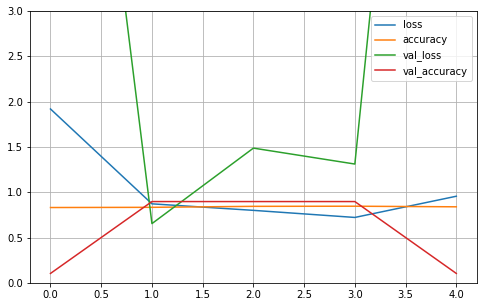

In [ ]:
#Import package
import pandas as pd
import matplotlib.pyplot as plt

#Data to pandas dataframe
pd.DataFrame(train_model0.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3) 
plt.show()

Sur le graphique ci-dessus, nous pouvons voir la fonction de perte représentée en bleu et l'accuracy.  
Lorsque le nombre d'epochs augmente, la fonction de perte diminue dans un premier temps rapidement, puis elle diminue plus lentement avant de remonter légèrment. L'accuracy est plutôt constante quelque soit le nombre d'epochs.

In [ ]:
model0.evaluate(X_test, y_test)

448/448 [==============================] - 1s 1ms/step - loss: 12.1108 - accuracy: 0.1165


[12.110767364501953, 0.11652586609125137]

In [ ]:
# Prédiction
y_pred0 = model0.predict(X_test)
y_pred0

448/448 [==============================] - 1s 1ms/step


array([[0.9999973 ],
       [0.9999969 ],
       [0.99999046],
       ...,
       [0.9999988 ],
       [0.9999999 ],
       [0.999999  ]], dtype=float32)

In [ ]:
binary_pred0 = (y_pred0 > 0.5).astype(int)
binary_pred0

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# accuracy modèle 0
accuracy_score(y_test,binary_pred0)

0.1165258674858619

- Deuxième modèle

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4700      
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 25,001
Trainable params: 25,001
Non-trainable params: 0
_________________________________________________________________
None


On a 25001 paramètres dans ce réseau de neurones. La couche d'entrée contient 100 neurones, chacun de ses neurones est associé à nos features. On rajoute pour chaque neurone un terme de biais (ceci nous permet d'obtenir 4700 paramètres).
Ce modèle est constitué de deux couches cachées qui contiennent également 100 neurones multipliés par les 100 neurones en entrée.
La couche de sortie contient 1 biais plus les 100 neurones de la couche précédente. Ceci nous permet de retrouver les 25001 paramètres.

In [ ]:
# Définir la fonction de perte
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_model = model.fit(X_train2, y_train2, epochs=30, validation_data=(X_test, y_test))


Epoch 1/30
336/336 [==============================] - 5s 9ms/step - loss: 0.3205 - accuracy: 0.8851 - val_loss: 0.3241 - val_accuracy: 0.8837
Epoch 2/30
336/336 [==============================] - 2s 7ms/step - loss: 0.3192 - accuracy: 0.8846 - val_loss: 0.3579 - val_accuracy: 0.8835
Epoch 3/30
336/336 [==============================] - 2s 6ms/step - loss: 0.3171 - accuracy: 0.8844 - val_loss: 0.3413 - val_accuracy: 0.8835
Epoch 4/30
336/336 [==============================] - 2s 6ms/step - loss: 0.3319 - accuracy: 0.8812 - val_loss: 0.3402 - val_accuracy: 0.8835
Epoch 5/30
336/336 [==============================] - 2s 7ms/step - loss: 0.3144 - accuracy: 0.8854 - val_loss: 0.3888 - val_accuracy: 0.8856
Epoch 6/30
336/336 [==============================] - 2s 7ms/step - loss: 0.3126 - accuracy: 0.8866 - val_loss: 0.3139 - val_accuracy: 0.8842
Epoch 7/30
336/336 [==============================] - 3s 8ms/step - loss: 0.3135 - accuracy: 0.8833 - val_loss: 0.3039 - val_accuracy: 0.8851
Epoch 

In [ ]:
w, biais = model.layers[1].get_weights()
print(w)
print(w.shape)

[[-0.16199584 -0.13624698 -0.08670863 ... -0.10900483  0.08569059
   0.0220419 ]
 [ 0.02883907  0.11914548 -0.11509003 ... -0.07869487  0.12712821
  -0.11485828]
 [-0.01903331 -0.17735732  0.08397567 ... -0.02935778  0.09510659
   0.14339277]
 ...
 [-0.15274985 -0.06335559  0.07997626 ...  0.06970803  0.08672469
   0.05894059]
 [ 0.0490898   0.08929884  0.16126531 ... -0.0298779   0.16945517
  -0.03159074]
 [ 0.12455726 -0.09547954  0.16800934 ... -0.01331584  0.01757941
   0.07402204]]
(100, 100)


In [ ]:
#Data to pandas dataframe
pd.DataFrame(train_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 4) 
plt.show() 

Sur le graphique ci-dessus, nous pouvons voir la fonction de perte représentée en bleu et l'accuracy.  
Lorsque le nombre d'epochs augmente, la fonction de perte chute rapidement puis se stabilise à parrir de 5 epochs. L'accuracy est plutôt constante quelque soit le nombre d'epochs.

In [ ]:
model.evaluate(X_test, y_test)

448/448 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8835


[0.33623453974723816, 0.8834741115570068]

In [ ]:
# Prédiction
y_pred = model.predict(X_test)
y_pred

448/448 [==============================] - 1s 1ms/step


array([[0.02015779],
       [0.02015829],
       [0.0132083 ],
       ...,
       [0.02828269],
       [0.12803206],
       [0.03603827]], dtype=float32)

In [ ]:
binary_pred = (y_pred > 0.5).astype(int)
binary_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# accuracy du modèle Model
accuracy_score(y_test,binary_pred)

0.8834741325141381

- Troisième modèle

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model2 = Sequential()
model2.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(1, activation='sigmoid'))
print(model2.summary())



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                470       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None


On a 481 paramètres dans ce réseau de neurones. La couche d'entrée contient 10 neurones, chacun de ses neurones est associé à nos feautures. On rajoute pour chaque neurone un terme de biais (ceci nous permet d'obtenir 470 paramètres).
La couche de sortie contient 1 biais plus les 10 neurones de la couche précédente. Ceci nous permet de retrouver les 481 paramètres.

In [ ]:
# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#
train_model2 = model2.fit(X_train2, y_train2, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
336/336 [==============================] - 2s 4ms/step - loss: 0.4719 - accuracy: 0.8708 - val_loss: 0.3896 - val_accuracy: 0.8921
Epoch 2/30
336/336 [==============================] - 1s 4ms/step - loss: 0.4163 - accuracy: 0.8752 - val_loss: 0.9875 - val_accuracy: 0.8835
Epoch 3/30
336/336 [==============================] - 1s 3ms/step - loss: 0.5122 - accuracy: 0.8605 - val_loss: 0.4158 - val_accuracy: 0.8905
Epoch 4/30
336/336 [==============================] - 1s 4ms/step - loss: 0.4929 - accuracy: 0.8665 - val_loss: 0.7650 - val_accuracy: 0.6023
Epoch 5/30
336/336 [==============================] - 1s 4ms/step - loss: 0.3880 - accuracy: 0.8808 - val_loss: 1.0252 - val_accuracy: 0.3628
Epoch 6/30
336/336 [==============================] - 1s 4ms/step - loss: 0.4053 - accuracy: 0.8751 - val_loss: 0.6029 - val_accuracy: 0.8841
Epoch 7/30
336/336 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8769 - val_loss: 0.7102 - val_accuracy: 0.8835
Epoch 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Data to pandas dataframe
pd.DataFrame(train_model2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()  

Sur le graphique ci-dessus, nous pouvons voir la fonction de perte représentée en bleu et l'accuracy.  
Contrairemetn au auxtres modèles, la fonction de perte connait des augmentations et des baisses en fonction du nombe d'epochs. Elle ne diminue pas continuellement.
L'accuracy est plutôt constante quelque soit le nombre d'epochs, malgré quelque légère hausses et baisses.

In [ ]:
# Evaluate the model on the test data
model2.evaluate(X_test, y_test, batch_size=32)

448/448 [==============================] - 1s 1ms/step - loss: 0.3081 - accuracy: 0.8854


[0.30809593200683594, 0.8854290246963501]

In [ ]:
model2.predict(X_test)

448/448 [==============================] - 1s 1ms/step


array([[0.02750381],
       [0.01840287],
       [0.00971562],
       ...,
       [0.06249593],
       [0.29290074],
       [0.04980281]], dtype=float32)

In [ ]:
y_pred2 = model2.predict(X_test)
binary_predictions2 = (y_pred2 > 0.5).astype(int)
binary_predictions2

448/448 [==============================] - 1s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# accuracy
accuracy_score(y_test,binary_predictions2)

0.8854290302310969

Nous avons utilisé la fonction accuracy afin de prédir l'efficacité de modèle.
Nos modèles ont des prévisions efficace à 88.35%.

#Conclusion


L'objectif de notre projet était de prédire combien de personnes vont ouvrir un compte bancaire avec l'institution bancaire portugais.

Nous avons commencé par réaliser une analyser et traiter les données en réalisant des statistiques descriptives, vérification de la corrélation entre nos variables explicatives et nettoyer nos données. Nous avons fait le choix de ne pas supprimer les individus atypiques parce que ça réduisait notre base de données de façon significative.

Ensuite, nous avons réalisé des classifications afin de pouvoir prédire notre variable.

Nous avons commencé par réaliser une classification multiclass, cette dernière nous a permis d'obtenir la conclusion suivante :
12473 personnes ne vont pas ouvrir un compte bancaire avec l'institution bancaire portugais et a contrario 294 personnes vont ouvrir un compte bancaire avec cette institution, ces prédictions correspondent à la réalité.
Dans cette matrice de prédiction, nous avons également des faux positives et faux négatives. En effet, le modèle a prédit que 1375 individus allaient ouvrir un compte bancaire avec l'institution portugais, or ce n'était pas le cas. Il a également prédit que 181 individus n'allaient pas ouvrir un compte bancaire avec cette institution, alors que dans la réalité, ils ont ouvert un compte bancaire.

Pour terminer, nous avons réalisé une classification avec keras. Nous avons réalisé trois modèles, dont un, il a deux couches cachées. Ces modèles ont respectivement 4801,25001 et 481 paramètres.
Nous avons ensuite utilisé la fonction accuracy afin de prédire l'efficacité de modèles. Nous constatons que les trois modèles ont des prévisions efficaces à 88.35%.

#Annexe 

Régression logistique

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [ ]:
#Regression logistique
lgr = LogisticRegression( random_state=42)
lgr.fit(X_train_sc, y_train)

#Linear SVM
l_SVC = LinearSVC(random_state=42, max_iter=2000)
l_SVC.fit(X_train_sc, y_train)

#SVM avec kernel
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train_sc,y_train)

#SGD classifier
sgdc_svm = SGDClassifier(loss='hinge' ,random_state=42)
sgdc_svm.fit(X_train_sc, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SGDClassifier(random_state=42)

In [ ]:
# Get cross_val_score for each function

cvs_lgr = cross_val_score(lgr, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_lsvc = cross_val_score(l_SVC, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_svc = cross_val_score(svc, X_train_sc, y_train, cv=5, scoring='accuracy')

cvs_sgdc = cross_val_score(sgdc_svm, X_train_sc, y_train, cv=5, scoring='accuracy')

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#Get data output from cross_val_score
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_lgr,cvs_lsvc,cvs_sgdc,cvs_svc]), 
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['lgr','lsvc','sgdc','svc']

In [ ]:
#Regardons l'évolution des scores pour chaque fold
for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:4] ,label='Line '+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

In [ ]:
df_cross.head(5)

fold1     fold2     fold3     fold4     fold5 model
0  0.902269  0.895288  0.896648  0.905028  0.900489   lgr
1  0.900175  0.897033  0.895601  0.905028  0.900489  lsvc
2  0.897731  0.895637  0.894204  0.887919  0.890712  sgdc
3  0.897382  0.897731  0.896299  0.900838  0.900838   svc

In [ ]:
for i in range(4):

    mean_model = df_cross.iloc[:,0:5].mean(axis=1)[i]
    std_model = df_cross.iloc[:,0:5].std(axis=1)[i]
    
    print('Le modèle N° '+ str(i) + ' a une accuray de '  + str(mean_model) + ' et un std : ' + str(std_model))
 

Le modèle N° 0 a une accuray de 0.8999443046983924 et un std : 0.004002804355804882
Le modèle N° 1 a une accuray de 0.8996649994637652 et un std : 0.0036450522188170085
Le modèle N° 2 a une accuray de 0.8932406865756042 et un std : 0.003922638343326768
Le modèle N° 3 a une accuray de 0.8986176596761141 et un std : 0.0020945497412977257


On constate que ces 4 méthodes ont des performances très proches. En effet en arrondissant elles sont toutes à 89%